# Perfect Plots: Waffle plot

https://www.machinelearningplus.com/plots/top-50-matplotlib-visualizations-the-master-plots-python/

## pip install pywaffle

In [1]:
%load_ext nb_black
#%load_ext pycodestyle_magic
#%pycodestyle_on

<IPython.core.display.Javascript object>

In [2]:
from pywaffle import Waffle
import squarify
import pandas as pd
import matplotlib.pyplot as plt

<IPython.core.display.Javascript object>

# Car market analysis
Source of data: https://github.com/selva86/datasets/blob/master/mpg_ggplot2.csv

GSuite Text and Background Palette: https://yagisanatode.com/2019/08/06/google-apps-script-hexadecimal-color-codes-for-google-docs-sheets-and-slides-standart-palette/

In [3]:
df = pd.read_csv("/media/wojciech/D6DE33C1DE339927/1A/mpg_ggplot2.txt")
df.head()

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
0,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
1,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
2,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
3,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
4,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact


<IPython.core.display.Javascript object>

In [4]:
df = df.groupby("class").size().reset_index(name="counts")
df

,class,counts
0,2seater,5
1,compact,47
2,midsize,41
3,minivan,11
4,pickup,33
5,subcompact,35
6,suv,62


<IPython.core.display.Javascript object>

/home/wojciech/.local/lib/python3.6/site-packages/pywaffle/waffle.py:394: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.
  self.ax = self.add_subplot(loc, aspect="equal")


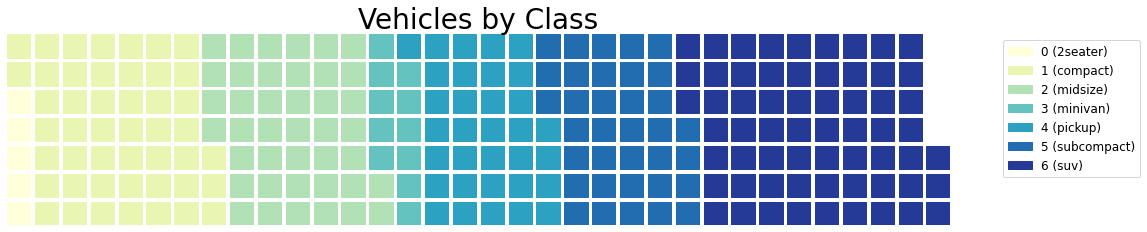

<IPython.core.display.Javascript object>

In [5]:
# Prepare Data

n_categories = df.shape[0]
colors = [plt.cm.YlGnBu(i / float(n_categories)) for i in range(n_categories)]

# Draw Plot and Decorate
fig = plt.figure(
    FigureClass=Waffle,
    plots={
        "111": {
            "values": df["counts"],
            "labels": [
                "{0} ({1})".format(n[0], n[1])
                for n in df[["class", "counts"]].itertuples()
            ],
            "legend": {
                "loc": "upper left",
                "bbox_to_anchor": (1.05, 1),
                "fontsize": 12,
            },
            "title": {"label": "Vehicles by Class", "loc": "center", "fontsize": 28},
        },
    },
    rows=7,
    colors=colors,
    figsize=(16, 9),
)

In [6]:
n_categories

7

<IPython.core.display.Javascript object>

In [7]:
colors

[(1.0, 1.0, 0.8509803921568627, 1.0),
 (0.9101268742791234, 0.9649365628604383, 0.6956401384083045, 1.0),
 (0.6984544405997694, 0.8818608227604767, 0.7138485198000769, 1.0),
 (0.39601691657054977, 0.7660745866974241, 0.7481430219146482, 1.0),
 (0.1729642445213379, 0.6295117262591311, 0.759523260284506, 1.0),
 (0.12764321414840446, 0.42666666666666664, 0.6861361014994233, 1.0),
 (0.14357554786620533, 0.22523644752018454, 0.5905420991926182, 1.0)]

<IPython.core.display.Javascript object>

## Titanic disaster
We ought to find which passengers have chance to survive according to their affiliation to the established groups.

Source of data: https://www.kaggle.com/shivamp629/traincsv

In [8]:
df2 = pd.read_csv("/media/wojciech/D6DE33C1DE339927/1A/kaggletrain.csv")
df2.head(3)

,Unnamed: 0,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


<IPython.core.display.Javascript object>

In [9]:
dfTDK = df2.groupby("Pclass").size().reset_index(name="counts")
dfTDK

,Pclass,counts
0,1,216
1,2,184
2,3,491


<IPython.core.display.Javascript object>

paltes: https://matplotlib.org/examples/color/colormaps_reference.html


cmaps = [('Perceptually Uniform Sequential', [
            'viridis', 'plasma', 'inferno', 'magma']),
         ('Sequential', [
            'Greys', 'Purples', 'Blues', 'Greens', 'Oranges', 'Reds',
            'YlOrBr', 'YlOrRd', 'OrRd', 'PuRd', 'RdPu', 'BuPu',
            'GnBu', 'PuBu', 'YlGnBu', 'PuBuGn', 'BuGn', 'YlGn']),
         ('Sequential (2)', [
            'binary', 'gist_yarg', 'gist_gray', 'gray', 'bone', 'pink',
            'spring', 'summer', 'autumn', 'winter', 'cool', 'Wistia',
            'hot', 'afmhot', 'gist_heat', 'copper']),
         ('Diverging', [
            'PiYG', 'PRGn', 'BrBG', 'PuOr', 'RdGy', 'RdBu',
            'RdYlBu', 'RdYlGn', 'Spectral', 'coolwarm', 'bwr', 'seismic']),
         ('Qualitative', [
            'Pastel1', 'Pastel2', 'Paired', 'Accent',
            'Dark2', 'Set1', 'Set2', 'Set3',
            'tab10', 'tab20', 'tab20b', 'tab20c']),
         ('Miscellaneous', [
            'flag', 'prism', 'ocean', 'gist_earth', 'terrain', 'gist_stern',
            'gnuplot', 'gnuplot2', 'CMRmap', 'cubehelix', 'brg', 'hsv',
            'gist_rainbow', 'rainbow', 'jet', 'nipy_spectral', 'gist_ncar'])]

/home/wojciech/.local/lib/python3.6/site-packages/pywaffle/waffle.py:394: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.
  self.ax = self.add_subplot(loc, aspect="equal")


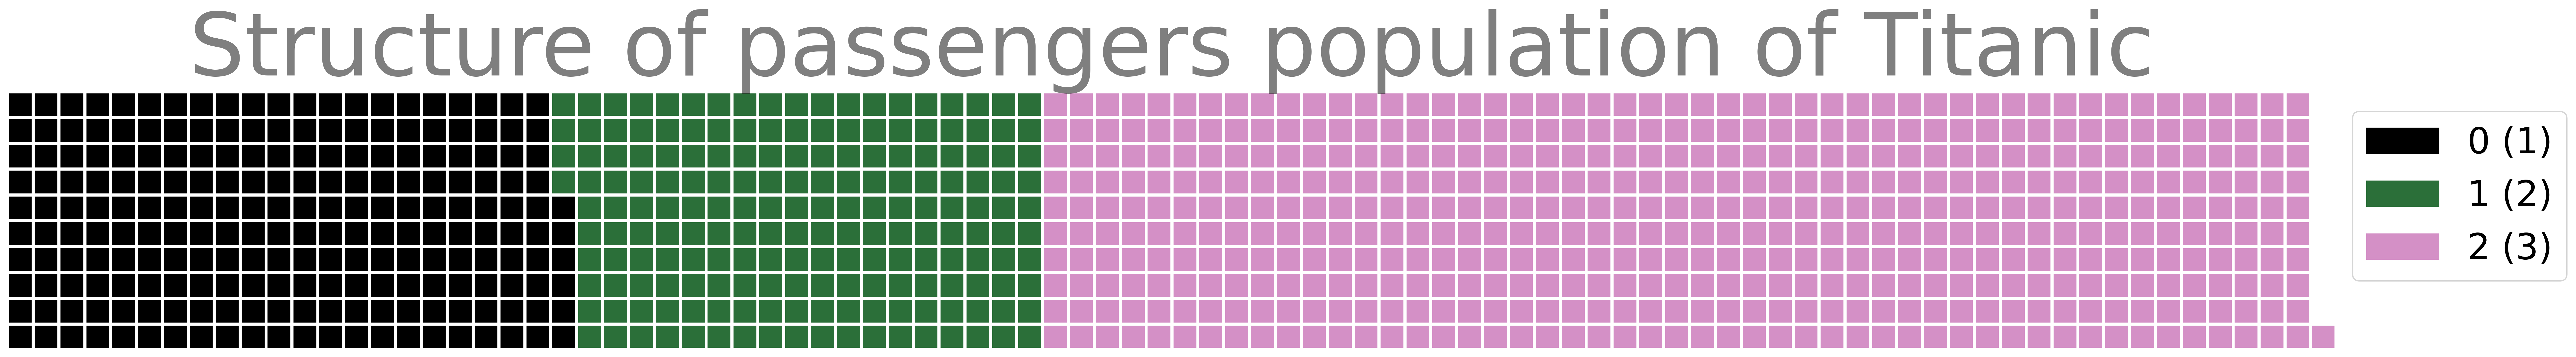

<IPython.core.display.Javascript object>

In [10]:
# Prepare Data

n_categories = dfTDK.shape[0]
colors2 = [plt.cm.cubehelix(i / float(n_categories)) for i in range(n_categories)]

## paltes: https://matplotlib.org/examples/color/colormaps_reference.html
# Draw Plot and Decorate
fig = plt.figure(
    dpi=380,
    FigureClass=Waffle,
    plots={
        "111": {
            "values": dfTDK["counts"],
            "labels": [
                "{0} ({1})".format(n[0], n[1])
                for n in dfTDK[["Pclass", "counts"]].itertuples()
            ],
            "legend": {"loc": "upper left", "bbox_to_anchor": (1.0, 1), "fontsize": 28},
            "title": {
                "label": "Structure of passengers population of Titanic",
                "loc": "center",
                "fontsize": 68,
                "alpha": 0.5,
            },
        },
    },
    rows=10,
    colors=colors2,
    figsize=(28, 7),
)

Embarked: (C = Cherbourg, Q = Queenstown, S = Southampton)

In [11]:
df2.Embarked = df2.Embarked.str.replace("C", "Cherbourg")
df2.Embarked = df2.Embarked.str.replace("Q", "Queenstown")
df2.Embarked = df2.Embarked.str.replace("S", "Southampton")
df2.sample(4)

,Unnamed: 0,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
642,642,643,0,3,"Skoog, Miss. Margit Elizabeth",female,2.0,3,2,347088,27.9000,NaN,Southampton
57,57,58,0,3,"Novel, Mr. Mansouer",male,28.5,0,0,2697,7.2292,NaN,Cherbourg
525,525,526,0,3,"Farrell, Mr. James",male,40.5,0,0,367232,7.7500,NaN,Queenstown
534,534,535,0,3,"Cacic, Miss. Marija",female,30.0,0,0,315084,8.6625,NaN,Southampton


<IPython.core.display.Javascript object>

In [12]:
dfPKP = df2.groupby("Embarked").size().reset_index(name="counts")
dfPKP

,Embarked,counts
0,Cherbourg,168
1,Queenstown,77
2,Southampton,644


<IPython.core.display.Javascript object>

/home/wojciech/.local/lib/python3.6/site-packages/pywaffle/waffle.py:394: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.
  self.ax = self.add_subplot(loc, aspect="equal")


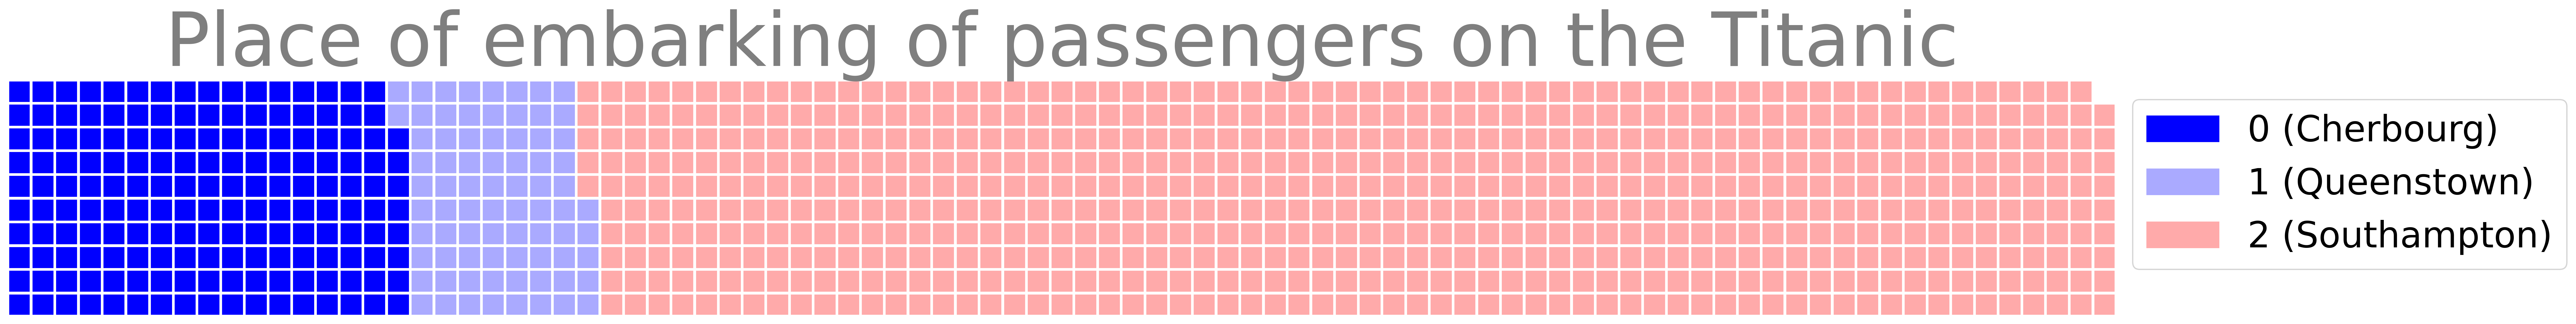

<IPython.core.display.Javascript object>

In [13]:
# Prepare Data

n_categories = dfPKP.shape[0]
colors2 = [plt.cm.bwr(i / float(n_categories)) for i in range(n_categories)]

## paltes: https://matplotlib.org/examples/color/colormaps_reference.html
# Draw Plot and Decorate
fig = plt.figure(
    dpi=380,
    FigureClass=Waffle,
    plots={
        "111": {
            "values": dfPKP["counts"],
            "labels": [
                "{0} ({1})".format(n[0], n[1])
                for n in dfPKP[["Embarked", "counts"]].itertuples()
            ],
            "legend": {"loc": "upper left", "bbox_to_anchor": (1.0, 1), "fontsize": 28},
            "title": {
                "label": "Place of embarking of passengers on the Titanic",
                "loc": "center",
                "fontsize": 58,
                "alpha": 0.5,
            },
        },
    },
    rows=10,
    colors=colors2,
    figsize=(28, 7),
)

In [14]:
df3 = pd.read_csv("/home/wojciech/Perfect-Plots__GIP/bank.csv")
df3.head(3)

,Unnamed: 0,Unnamed: 0.1,age,job,marital,education,default,housing,loan,contact,...,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
0,0,0,44,blue-collar,married,basic.4y,unknown,yes,no,cellular,...,1,999,0,nonexistent,1.4,93.444,-36.1,4.963,5228.1,0
1,1,1,53,technician,married,unknown,no,no,no,cellular,...,1,999,0,nonexistent,-0.1,93.200,-42.0,4.021,5195.8,0
2,2,2,28,management,single,university.degree,no,yes,no,cellular,...,3,6,2,success,-1.7,94.055,-39.8,0.729,4991.6,1


<IPython.core.display.Javascript object>

In [15]:
df_STS = df3.pivot_table(
    index="job", values="Unnamed: 0", aggfunc="count"
).reset_index()
df_STS.sort_values("Unnamed: 0", ascending=False)

,job,Unnamed: 0
0,admin.,10422
1,blue-collar,9254
9,technician,6743
7,services,3969
4,management,2924
5,retired,1720
2,entrepreneur,1456
6,self-employed,1421
3,housemaid,1060
10,unemployed,1014


<IPython.core.display.Javascript object>

In [16]:
n_categories = df_STS.shape[0]
colors2 = [plt.cm.bwr(i / float(n_categories)) for i in range(n_categories)]

## paltes: https://matplotlib.org/examples/color/colormaps_reference.html
# Draw Plot and Decorate
fig = plt.figure(
    dpi=180,
    FigureClass=Waffle,
    plots={
        "111": {
            "values": df_STS["Unnamed: 0"],
            "labels": [
                "{0} ({1})".format(n[0], n[1])
                for n in df_STS[["job", "Unnamed: 0"]].itertuples()
            ],
            "legend": {
                "loc": "upper left",
                "bbox_to_anchor": (1.0, 1),
                "fontsize": 128,
            },
            "title": {
                "label": "Structure of bank customers by occupation",
                "loc": "center",
                "fontsize": 158,
                "alpha": 0.5,
            },
        },
    },
    rows=150,
    colors=colors2,
    figsize=(118, 70),
)

/home/wojciech/.local/lib/python3.6/site-packages/pywaffle/waffle.py:394: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.
  self.ax = self.add_subplot(loc, aspect="equal")


<IPython.core.display.Javascript object>

# Structure of airports
Source of data: http://ourairports.com/data/airports.csv

In [17]:
df4 = pd.read_csv("/media/wojciech/D6DE33C1DE339927/1A/airports.csv")
df4.head(4)

,id,ident,type,name,latitude_deg,longitude_deg,elevation_ft,continent,iso_country,iso_region,municipality,scheduled_service,gps_code,iata_code,local_code,home_link,wikipedia_link,keywords
0,6523,00A,heliport,Total Rf Heliport,40.070801,-74.933601,11.0,NaN,US,US-PA,Bensalem,no,00A,NaN,00A,NaN,NaN,NaN
1,323361,00AA,small_airport,Aero B Ranch Airport,38.704022,-101.473911,3435.0,NaN,US,US-KS,Leoti,no,00AA,NaN,00AA,NaN,NaN,NaN
2,6524,00AK,small_airport,Lowell Field,59.949200,-151.695999,450.0,NaN,US,US-AK,Anchor Point,no,00AK,NaN,00AK,NaN,NaN,NaN
3,6525,00AL,small_airport,Epps Airpark,34.864799,-86.770302,820.0,NaN,US,US-AL,Harvest,no,00AL,NaN,00AL,NaN,NaN,NaN


<IPython.core.display.Javascript object>

In [18]:
PL = df4[df4["iso_country"] == "PL"]

<IPython.core.display.Javascript object>

In [19]:
PPL = PL.pivot_table(index="type", values="id", aggfunc="count").reset_index()
PPL

,type,id
0,closed,25
1,heliport,3
2,large_airport,7
3,medium_airport,22
4,small_airport,218


<IPython.core.display.Javascript object>

/home/wojciech/.local/lib/python3.6/site-packages/pywaffle/waffle.py:394: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.
  self.ax = self.add_subplot(loc, aspect="equal")


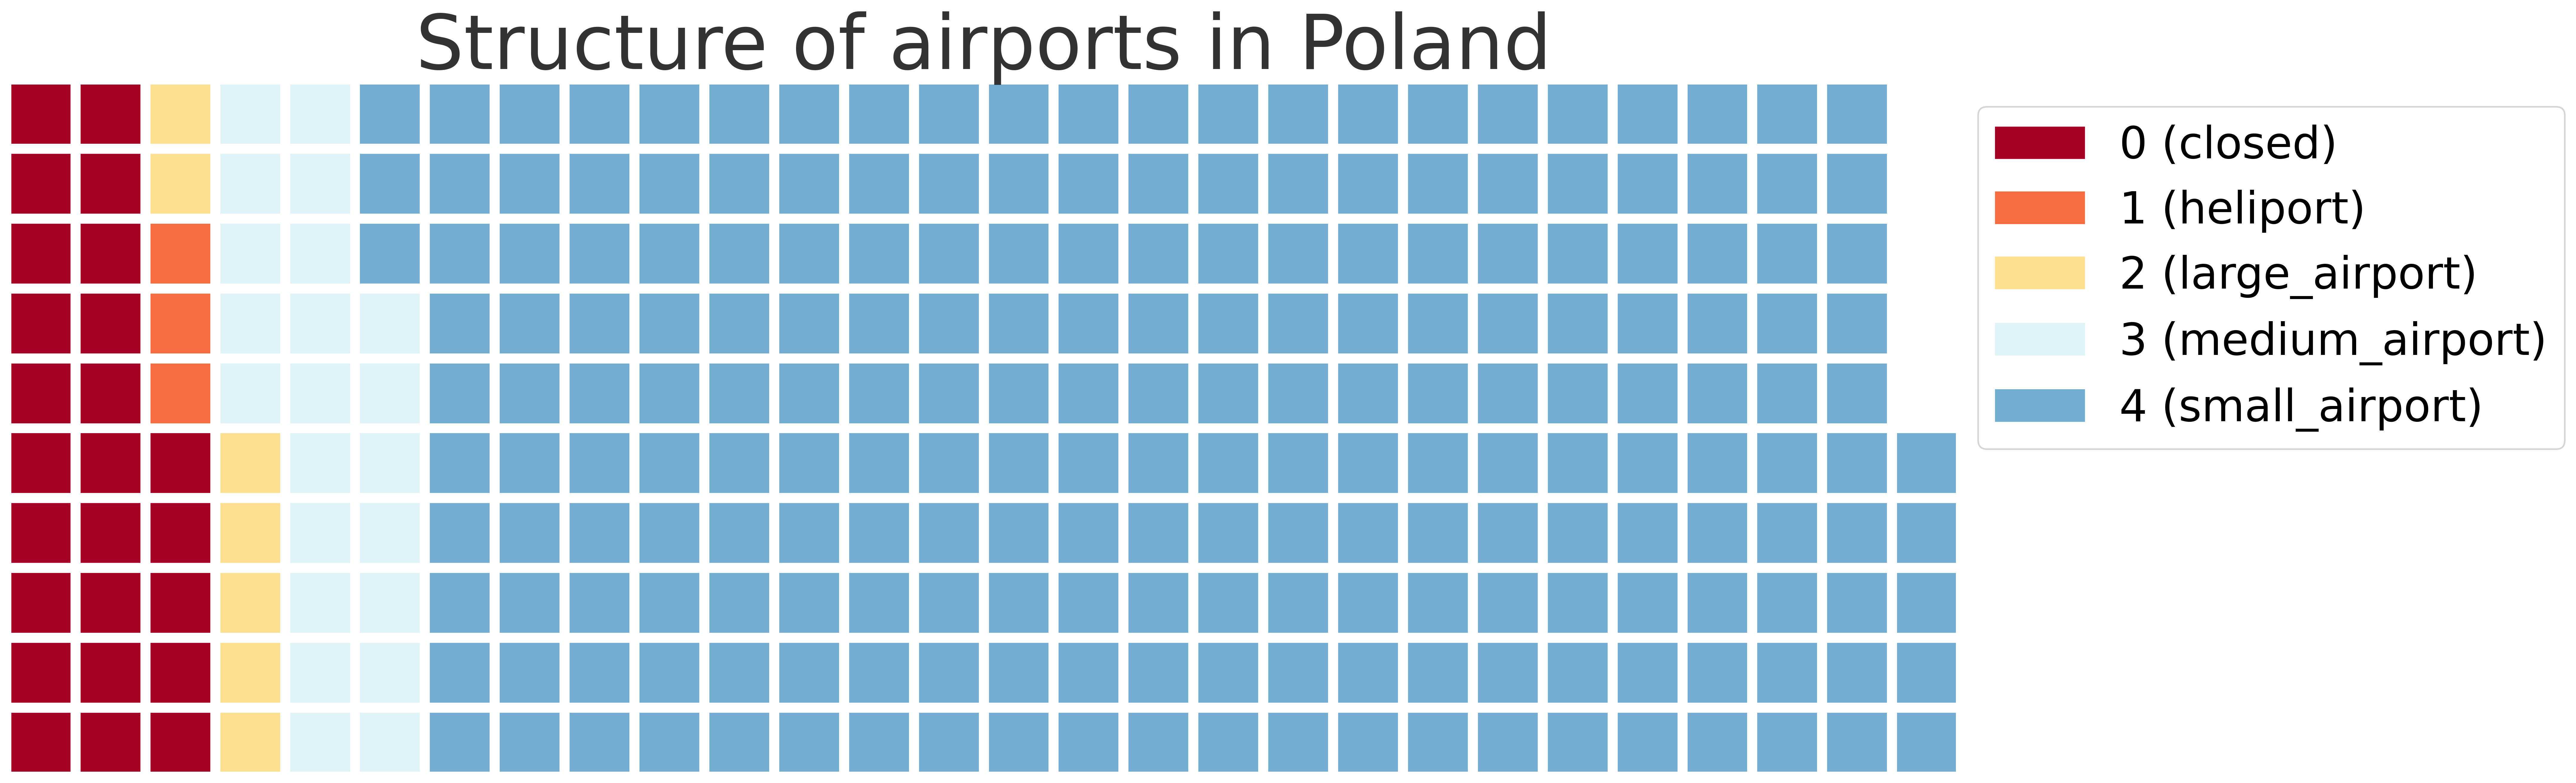

<IPython.core.display.Javascript object>

In [20]:
n_categories = PPL.shape[0]
colors2 = [plt.cm.RdYlBu(i / float(n_categories)) for i in range(n_categories)]

## paltes: https://matplotlib.org/examples/color/colormaps_reference.html
# Draw Plot and Decorate
fig = plt.figure(
    dpi=380,
    FigureClass=Waffle,
    plots={
        "111": {
            "values": PPL["id"],
            "labels": [
                "{0} ({1})".format(n[0], n[1]) for n in PPL[["type", "id"]].itertuples()
            ],
            "legend": {"loc": "upper left", "bbox_to_anchor": (1.0, 1), "fontsize": 28},
            "title": {
                "label": "Structure of airports in Poland",
                "loc": "center",
                "fontsize": 48,
                "alpha": 0.8,
            },
        },
    },
    rows=10,
    colors=colors2,
    figsize=(28, 7),
)